In [1]:
!pip install galpy

In [5]:
import galpy
print(galpy.__version__)

1.10.2


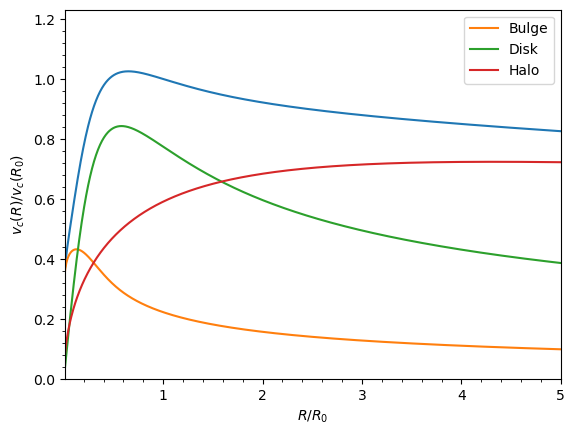

In [6]:
#question 10
#using some examples from try galpy on the documentation
#plotting the rotation curve of the milky way
from galpy.potential import (plotRotcurve,
        MWPotential2014 as mwp14) #pulling from data on the potential of teh Milky Way from 2014
import matplotlib.pyplot as plt
plotRotcurve(mwp14)
#plotting the rotation curves for individual parts of the Milky Way
plotRotcurve(mwp14[0],label='Bulge',overplot=True) 
plotRotcurve(mwp14[1],label='Disk',overplot=True)
plotRotcurve(mwp14[2],label='Halo',overplot=True)
plt.legend()

In [7]:
#question 10
#calculating the sun's orbital actions
from galpy.orbit import Orbit
from galpy.potential import (
        MWPotential2014 as mwp14) 
o= Orbit()
print(o.jr(pot=mwp14),o.Lz(),o.jz(pot=mwp14))
print(o.Or(pot=mwp14),o.Op(pot=mwp14),o.Oz(pot=mwp14))
print(o.wr(pot=mwp14),o.wp(pot=mwp14),o.wz(pot=mwp14))

6.631752533494941 1857.92 0.3707240340567549
nan nan nan
nan nan nan


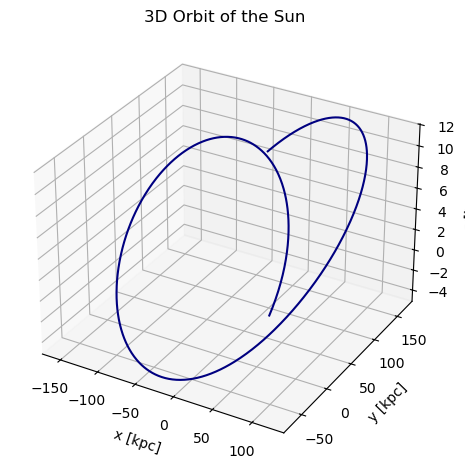

In [25]:
#plotting the orbit of the sun in the Milky Way
from galpy.orbit import Orbit
from galpy.potential import MWPotential2014
import numpy as np
import matplotlib.pyplot as plt
import astropy

#defining an orbit based off the Sun 
#needs inputs galactocentric radius, radial velocity, tangential velocity, vertical position, vertical velocity, and azimuthal angle 
o = Orbit([8.2, -0.007, 1.05, 0.025, 0.074, 0.0], ro=8.0, vo=220.0)

ts = np.linspace(0, 200, 1000)#Myr

#integrate orbit
o.integrate(ts, MWPotential2014)

#extract positions in kpc
x = o.x(ts)
y = o.y(ts)
z = o.z(ts)

#plot
fig, ax = plt.subplots(1,1, subplot_kw = {"projection":"3d"})
ax.plot(x, y, z, color='navy')
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')
ax.set_zlabel('z [kpc]')
ax.set_title('3D Orbit of the Sun')
plt.tight_layout()
fig.savefig('final_plot.png')